### Importing libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# for the Q-Q plots
#import scipy.stats as stats
%matplotlib inline
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
#from pandas.io.json import json_normalize

### Loading dataset for receipts

In [17]:
receipts = pd.read_excel("receipts.xlsx")

In [18]:
receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 15 columns):
_id/$oid                   1119 non-null object
bonusPointsEarned          544 non-null float64
bonusPointsEarnedReason    544 non-null object
createDate                 1119 non-null int64
dateScanned                1119 non-null int64
finishedDate               568 non-null float64
modifyDate                 1119 non-null int64
pointsAwardedDate          537 non-null float64
pointsEarned               609 non-null float64
purchaseDate               671 non-null float64
purchasedItemCount         635 non-null float64
rewardsReceiptItemList     679 non-null object
rewardsReceiptStatus       1119 non-null object
totalSpent                 684 non-null float64
userId                     1119 non-null object
dtypes: float64(7), int64(3), object(5)
memory usage: 131.3+ KB


In [19]:
receipts.head()

,_id/$oid,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.00,"Receipt number 2 completed, bonus point schedu...",1609687531000,1609687531000,1609687531000.00,1609687536000,1609687531000.00,500.00,1609632000000.00,5.00,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.00,"Receipt number 5 completed, bonus point schedu...",1609687483000,1609687483000,1609687483000.00,1609687488000,1609687483000.00,150.00,1609601083000.00,2.00,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.00,All-receipts receipt bonus,1609687537000,1609687537000,nan,1609687542000,nan,5.00,1609632000000.00,1.00,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.00,All-receipts receipt bonus,1609687534000,1609687534000,1609687534000.00,1609687539000,1609687534000.00,5.00,1609632000000.00,4.00,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.00,All-receipts receipt bonus,1609687506000,1609687506000,1609687511000.00,1609687511000,1609687506000.00,5.00,1609601106000.00,2.00,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052


### Identifying numerical and categorical variables

In [20]:
# make lists of variable types

temporal = [var for var in receipts.columns if 'date' in var or 'Date' in var]

discrete = [
    var for var in receipts.columns if receipts[var].dtype != 'O'
    and len(receipts[var].unique()) < 20 and var not in temporal
]

continuous = [
    var for var in receipts.columns if receipts[var].dtype != 'O'
    if var not in discrete and var != '_id'
    and var not in temporal
]

categorical = [var for var in receipts.columns if receipts[var].dtype == 'O'
              and var not in temporal and var not in discrete]

print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(temporal)} temporal variables')
print(f'There are {len(categorical)} categorical variables')

There are 3 continuous variables
There are 1 discrete variables
There are 6 temporal variables
There are 5 categorical variables


In [21]:
continuous

['pointsEarned', 'purchasedItemCount', 'totalSpent']

In [22]:
discrete

['bonusPointsEarned']

In [23]:
temporal

['createDate',
 'dateScanned',
 'finishedDate',
 'modifyDate',
 'pointsAwardedDate',
 'purchaseDate']

In [24]:
categorical

['_id/$oid',
 'bonusPointsEarnedReason',
 'rewardsReceiptItemList',
 'rewardsReceiptStatus',
 'userId']

### Quantifying missing data

In [30]:
receipts.isnull().sum()

_id/$oid                     0
bonusPointsEarned          575
bonusPointsEarnedReason    575
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
pointsEarned               510
purchaseDate               448
purchasedItemCount         484
rewardsReceiptItemList     440
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
dtype: int64

##### percentage of missing values in variables

In [32]:
# alternatively, we can use the mean() method after isnull() to visualise the percentage of missing values for each variable
percentage_null_values= receipts.isnull().mean()
for key,value in percentage_null_values.items():
    if value >0:
        print(key,":",value*100)

bonusPointsEarned : 51.385165326184094
bonusPointsEarnedReason : 51.385165326184094
finishedDate : 49.240393208221626
pointsAwardedDate : 52.01072386058981
pointsEarned : 45.57640750670242
purchaseDate : 40.03574620196604
purchasedItemCount : 43.25290437890974
rewardsReceiptItemList : 39.32082216264522
totalSpent : 38.8739946380697


A considerate fraction of values are missing from the above mentioned variables. Missing values for certain variables are a major concern:

1. finishedDate- for 49%(almost half) of the receipts we don't know when do they become invalid(assuming that the date on which a receipt finishes processing is the date on which it becomes invalid)

In [34]:
receipts["pointsEarned"].unique()

array([5.00000e+02, 1.50000e+02, 5.00000e+00, 7.50000e+02, 2.50000e+02,
       1.00000e+02, 8.85000e+03, 3.00000e+02,         nan, 3.89200e+02,
       1.85000e+02, 3.50000e+01, 6.50000e+02, 5.50000e+01, 5.00000e+01,
       3.55000e+02, 6.00000e+02, 1.75000e+03, 3.50000e+02, 2.25000e+02,
       2.75000e+02, 2.50000e+01, 7.55000e+02, 1.80000e+03, 8.10000e+02,
       3.05000e+02, 9.44980e+03, 9.12000e+01, 8.25000e+02, 3.50600e+02,
       1.25000e+02, 7.93100e+02, 2.00000e+02, 3.25000e+03, 0.00000e+00,
       4.00500e+03, 2.00500e+03, 8.41200e+02, 5.75000e+03, 3.75000e+03,
       8.70000e+03, 7.60000e+02, 7.80000e+02, 9.20000e+03, 1.00500e+03,
       1.99960e+03, 1.89200e+02, 8.95000e+03, 8.85000e+02, 8.00000e+02,
       2.95000e+02, 6.82400e+02, 8.37400e+02, 2.37800e+02, 1.60000e+02,
       8.55700e+02, 6.05700e+02, 2.41670e+03, 1.80640e+03, 4.05700e+02,
       1.51690e+03, 1.65830e+03, 2.68580e+03, 8.79100e+02, 3.65940e+03,
       9.34400e+02, 8.77700e+02, 9.22100e+02, 1.54180e+03, 1.000

2. pointsEarned- 45% of the values for the 'pointsEarned' field are missing. If we look at the unique values for 'pointsEarned', we do not have a zero value. This means that points were earned for certain receipts but the data was not captured and that's why the large number of missing values.

3. purchasedItemCount- large number of missing values will pose problems for deciding if users who bought more than one unit of a product qualify for special offers/bonus points that require them to purchase certain amount of particular products/brands.

4. totalSpent, rewardsReceiptItemList- Since data for these two fields is missing, it is natural that we don't have information about points earned(pointsEarned field) for those transactions.

### Examining percentage of different category values for categorical variables

Here, the categorical variable of my interest is bonusPointsEarnedReason

In [37]:
freq_reasons = 100*(receipts['bonusPointsEarnedReason'].value_counts() / len(receipts))
print(freq_reasons.map('{:,.2f} %'.format))

All-receipts receipt bonus                                                             16.35 %
Receipt number 1 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)    10.63 %
COMPLETE_NONPARTNER_RECEIPT                                                             6.34 %
COMPLETE_PARTNER_RECEIPT                                                                3.49 %
Receipt number 3 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)     2.77 %
Receipt number 2 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)     2.68 %
Receipt number 5 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)     2.41 %
Receipt number 4 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)     2.32 %
Receipt number 6 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)     1.61 %
Name: bonusPointsEarnedReason, dtype: object


### Plotting outliers using boxplot

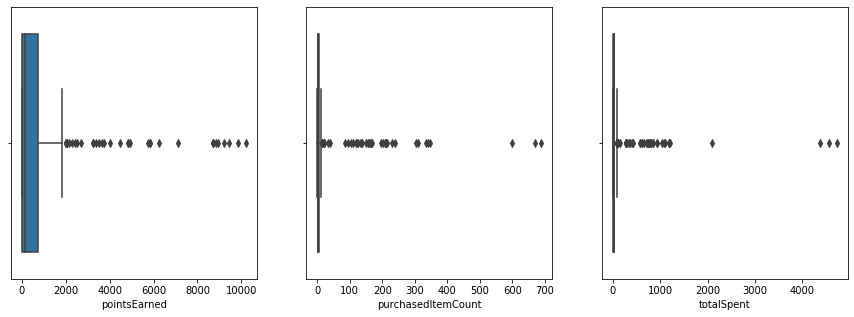

In [45]:
fig, axs = plt.subplots(ncols=3, nrows=1,figsize=(15,5))
axs = axs.flatten()

for i, var in enumerate(continuous):
    sns.boxplot(receipts[receipts[var].notnull()][var], ax=axs[i], orient='h');

By looking at the boxplots we can say that there is a significantly large range of outliers.

##### Examining distributions of continuous variables

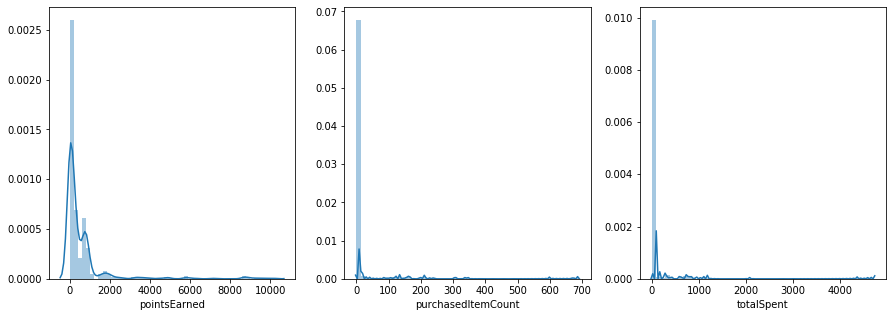

In [46]:
fig, axs = plt.subplots(ncols=3, nrows=1,figsize=(15,5))
axs = axs.flatten()

for i, var in enumerate(continuous):
    sns.distplot(receipts[receipts[var].notnull()][var], ax=axs[i]);

The distributions for all the three continuous variables are right-skewed. 

Both, the boxplots and value distribution diagrams suggest that there are a lot of outliers, but we can't say anything about the significance of these outliers at this point.

### Examining corelation between variables

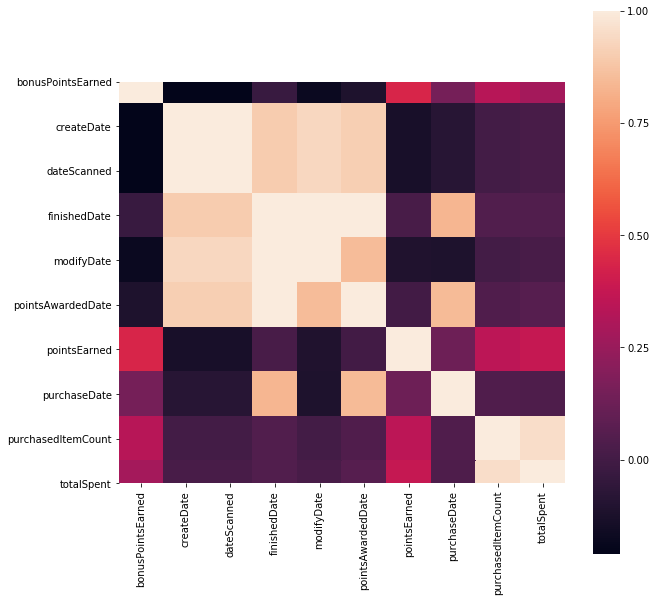

In [48]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 10))
corr = receipts.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), square=True, ax=ax
)

No significant corelations found.